<a href="https://www.kaggle.com/code/sedatakda/comparison-of-companies-s-esg-and-financial?scriptVersionId=257700077" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esg-and-financial-performance-dataset/company_esg_financial_dataset.csv


In [2]:
# ====================================================
# Company ESG Classification Project (Kaggle Template)
# ====================================================

# 1. Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# 2. Veri Seti Yükleme
df = pd.read_csv("/kaggle/input/esg-and-financial-performance-dataset/company_esg_financial_dataset.csv")

print("Veri Boyutu:", df.shape)
df.head()

Veri Boyutu: (11000, 16)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [4]:
df.tail()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3
10999,1000,Company_1000,Consumer Goods,Latin America,2025,3173.5,17.5,5666.1,-0.3,51.8,74.5,39.7,41.4,430741.6,538427.0,2153707.9


Problem Tanımı

Konu:
Şirketlerin finansal performansı ile ESG (Çevresel, Sosyal, Yönetişim) performansı arasındaki ilişkiyi anlamak ve sınıflandırma/regresyon modelleri ile geleceğe yönelik tahminler yapmak.

Amaç:

ESG skorlarının (özellikle çevresel etki: karbon salımı, su kullanımı, enerji tüketimi) şirketlerin finansal göstergelerini (Gelir, Kâr marjı, Piyasa değeri, Büyüme oranı) ne ölçüde etkilediğini incelemek.

Şirketleri yüksek ESG – düşük ESG veya yüksek performans – düşük performans gruplarına ayırmak.

ESG skorlarına göre yatırım yapılabilir şirketleri öngörmek.

Problem Tipi:

Eğer ESG skorunu tahmin etmek istiyorsak → Regresyon Problemi

Eğer şirketleri ESG seviyesine göre sınıflandırmak istiyorsak → Sınıflandırma Problemi

Eğer ESG-finansal skor ilişkisini görmek istiyorsak → Korelasyon / Özellik önem analizi (Feature Importance)

Veri Seti Özellikleri:

Finansal: Revenue, ProfitMargin, MarketCap, GrowthRate

ESG: ESG_Overall, ESG_Environmental, ESG_Social, ESG_Governance

Çevresel Göstergeler: CarbonEmissions, WaterUsage, EnergyConsumption

Kategorik: CompanyName, Industry, Region, Year

Araştırma Soruları:

ESG performansı yüksek olan şirketler, finansal olarak daha mı başarılı?

Karbon salımı, su ve enerji tüketimi finansal büyüme ve kârlılık üzerinde nasıl bir etkiye sahip?

ESG skorları, şirketleri yatırım açısından sınıflandırmada kullanılabilir mi?

Ön İşleme

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

Veri Ön İşleme Planı

Eksik değerleri doldurma (GrowthRate)

Şirket bazında ortalama/medyan kullanmak en mantıklı çünkü her şirketin büyüme trendi farklı olabilir.

In [6]:
# Eksik değerleri şirket bazında medyan ile dolduralım
df["GrowthRate"] = df.groupby("CompanyID")["GrowthRate"].transform(
    lambda x: x.fillna(x.median())
)


Şimdi kategorik değişkenleri (Industry, Region) sayısallaştırmamız lazım.

Burada iki yöntem var:

Label Encoding → her kategoriye bir sayı verir (sıralama yok).

One-Hot Encoding → her kategori için ayrı sütun açar (0–1).

Bizim veri setinde Industry ve Region kategorik → bunları One-Hot Encoding ile dönüştürmek daha mantıklı çünkü sıralama ilişkisi yok.

In [7]:
# Kategorik değişkenleri one-hot encoding ile dönüştürelim
df = pd.get_dummies(df, columns=["Industry", "Region"], drop_first=True)

df.head()


,CompanyID,CompanyName,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,...,Industry_Retail,Industry_Technology,Industry_Transportation,Industry_Utilities,Region_Asia,Region_Europe,Region_Latin America,Region_Middle East,Region_North America,Region_Oceania
0,1,Company_1,2015,459.2,6.0,337.5,4.85,57.0,60.7,33.5,...,True,False,False,False,False,False,True,False,False,False
1,1,Company_1,2016,473.8,4.6,366.6,3.20,56.7,58.9,32.8,...,True,False,False,False,False,False,True,False,False,False
2,1,Company_1,2017,564.9,5.2,313.4,19.20,56.5,57.6,34.0,...,True,False,False,False,False,False,True,False,False,False
3,1,Company_1,2018,558.4,4.3,283.0,-1.10,58.0,62.3,33.4,...,True,False,False,False,False,False,True,False,False,False
4,1,Company_1,2019,554.5,4.9,538.1,-0.70,56.6,63.7,30.0,...,True,False,False,False,False,False,True,False,False,False


In [8]:
from sklearn.model_selection import train_test_split

# Örnek: target = tahmin etmek istediğin sütun
target_column = 'ESG_Overall'  # veya senin hedef sütunun

# Bağımsız değişkenler
X = df.drop(columns=[target_column, 'CompanyID', 'CompanyName', 'Year'])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Keşifsel veri analizi

In [9]:
numerical_cols = X_train.select_dtypes(include=np.number).columns


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklerin notebook içinde güzel görünmesi için
%matplotlib inline
sns.set(style="whitegrid")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

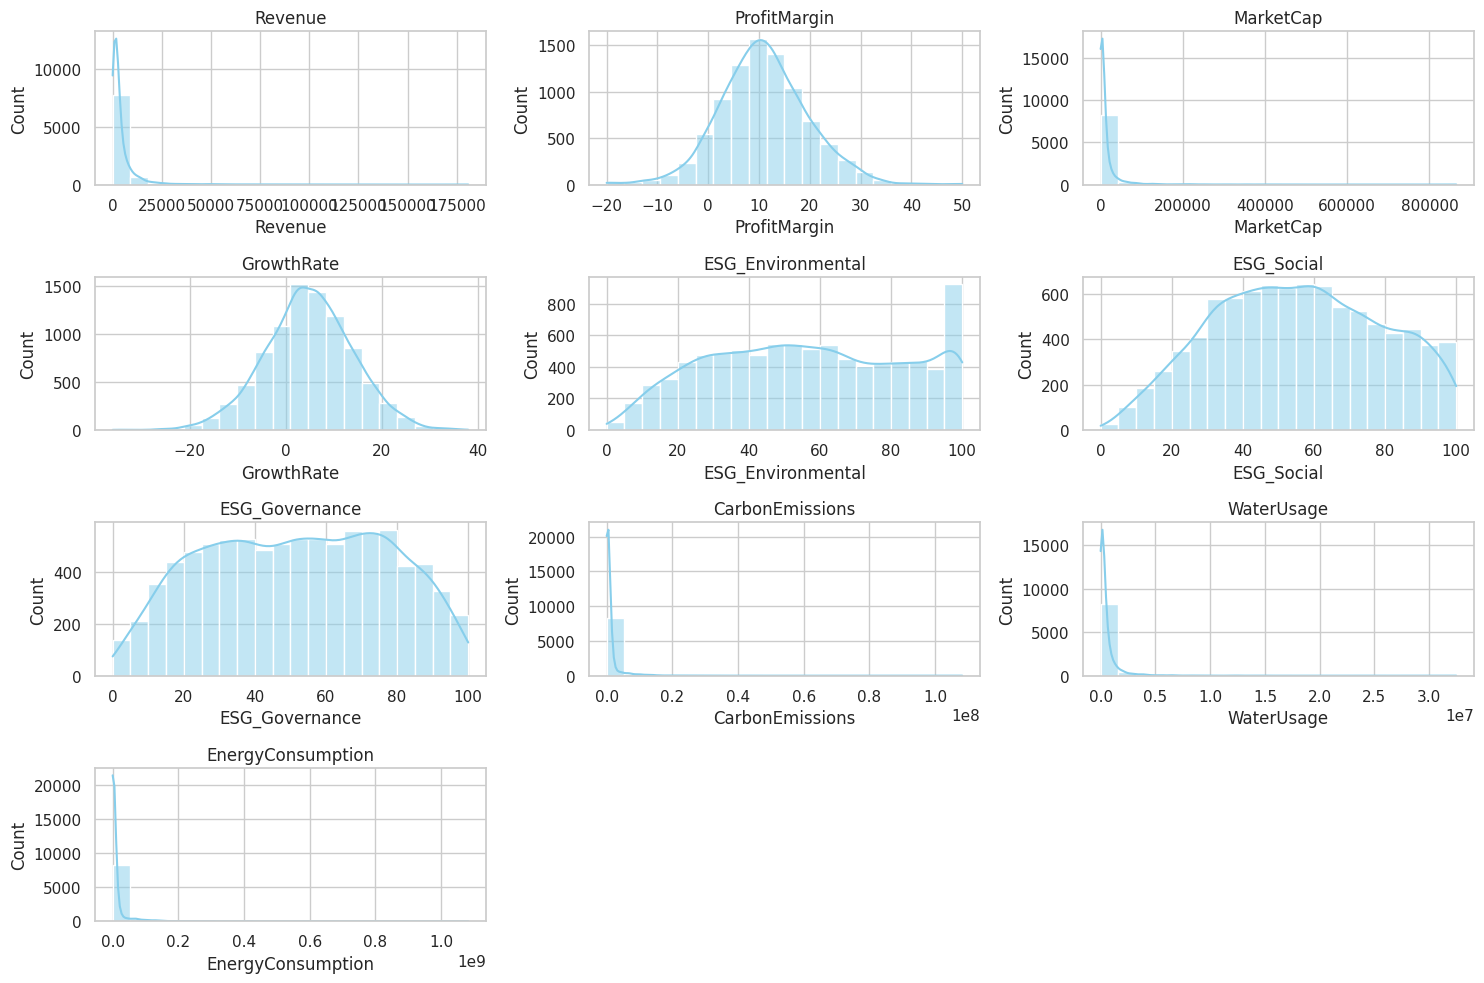

In [11]:
numerical_cols = X_train.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(X_train[col], bins=20, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


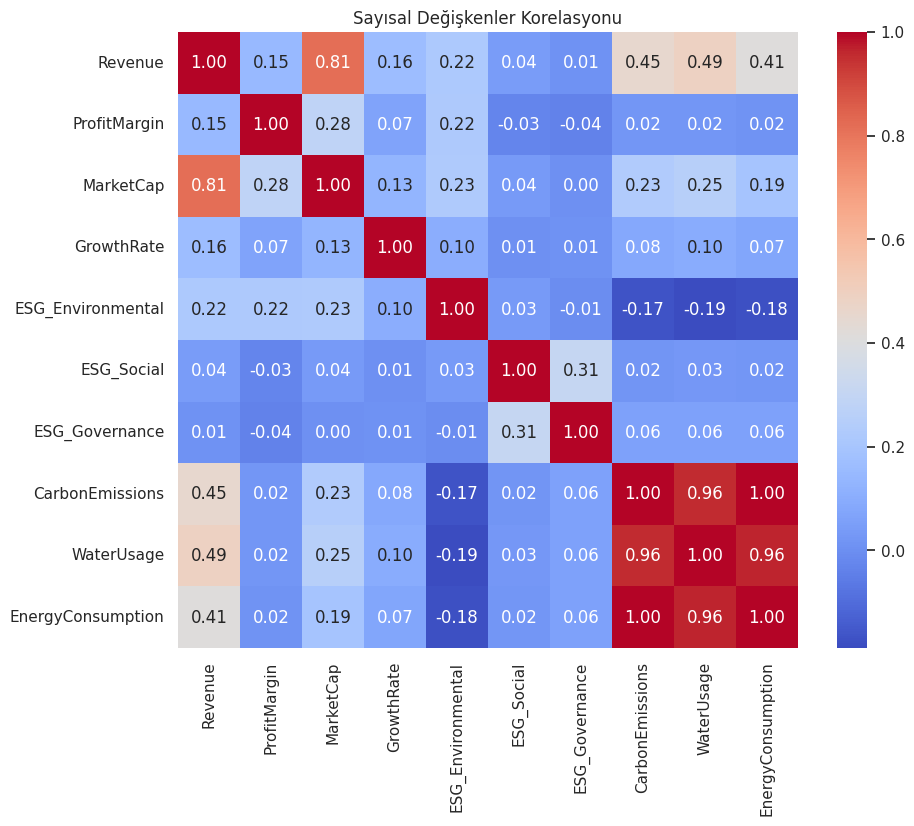

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sayısal Değişkenler Korelasyonu")
plt.show()


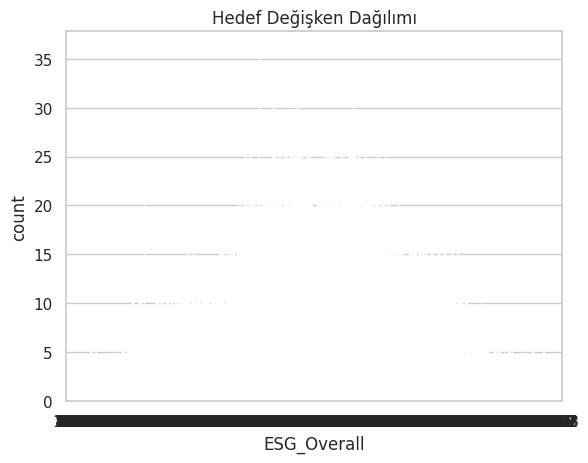

ESG_Overall
45.8    36
52.3    32
51.8    31
61.1    31
48.1    30
        ..
97.7     1
18.8     1
92.0     1
89.4     1
95.6     1
Name: count, Length: 808, dtype: int64


In [13]:
sns.countplot(x=y_train)
plt.title("Hedef Değişken Dağılımı")
plt.show()
print(y_train.value_counts())


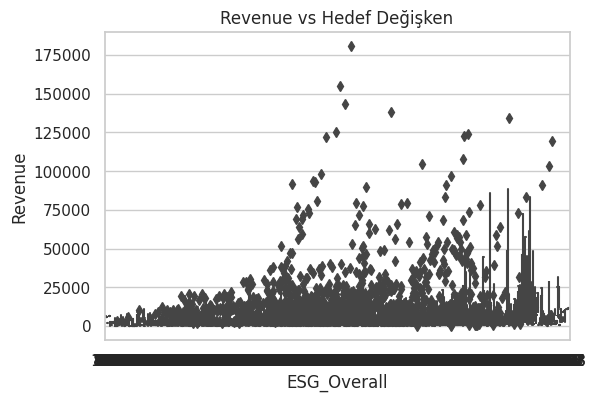

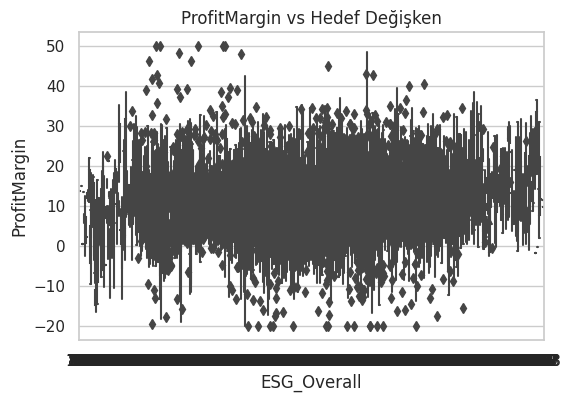

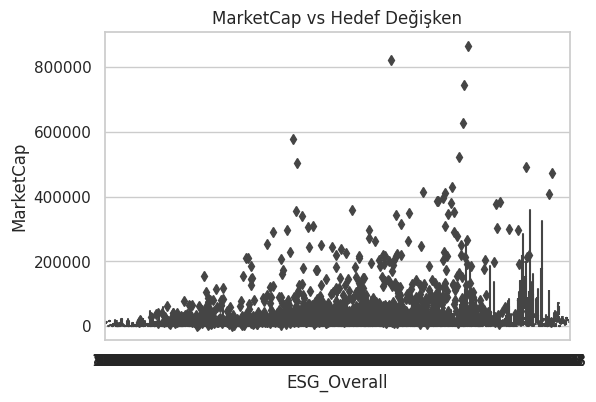

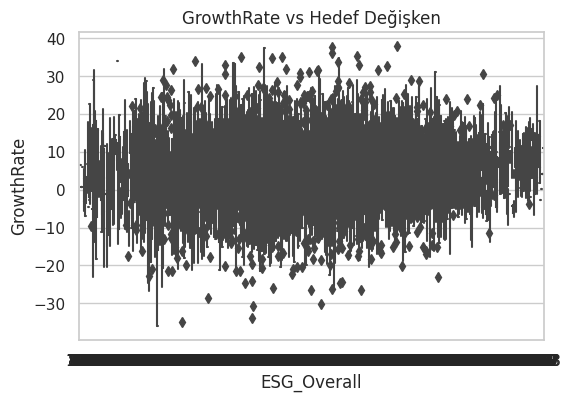

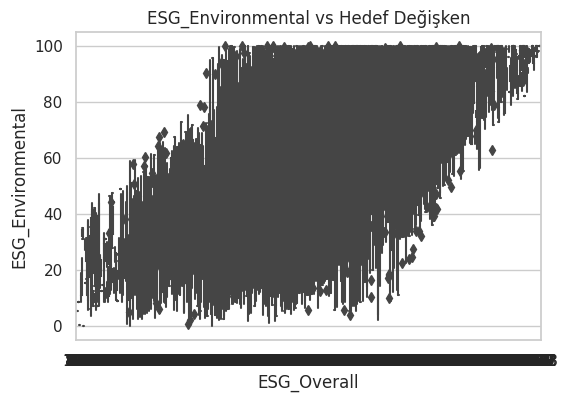

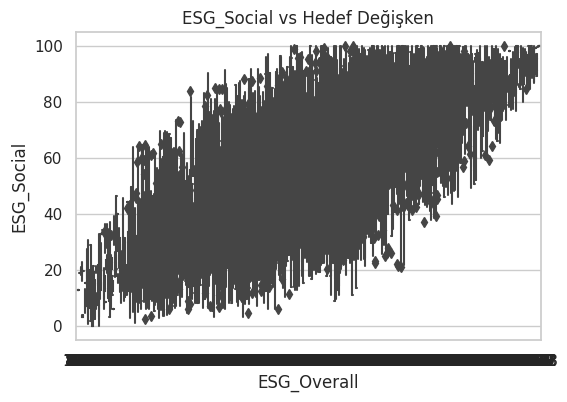

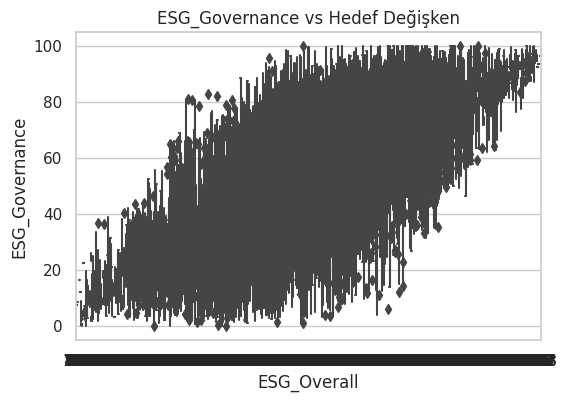

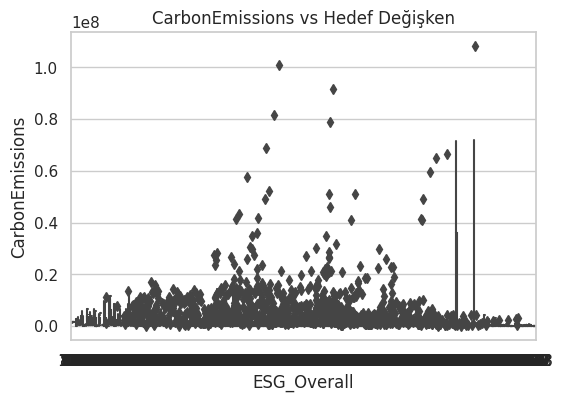

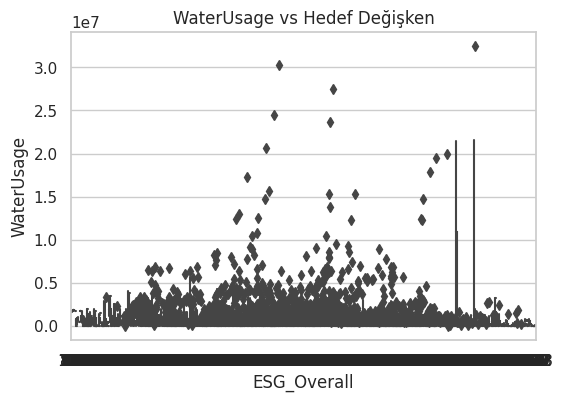

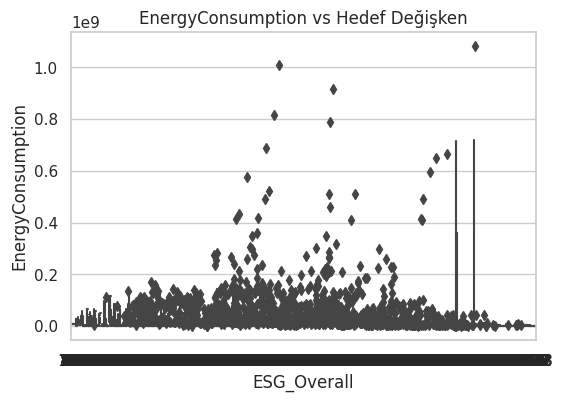

In [14]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(f"{col} vs Hedef Değişken")
    plt.show()

In [15]:
# ESG puanını 3 sınıfa ayır
y = pd.cut(df['ESG_Overall'], bins=[0, 50, 70, 100], labels=['Low','Medium','High'])

X = df.drop(columns=['ESG_Overall','CompanyID','CompanyName','Year'])


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


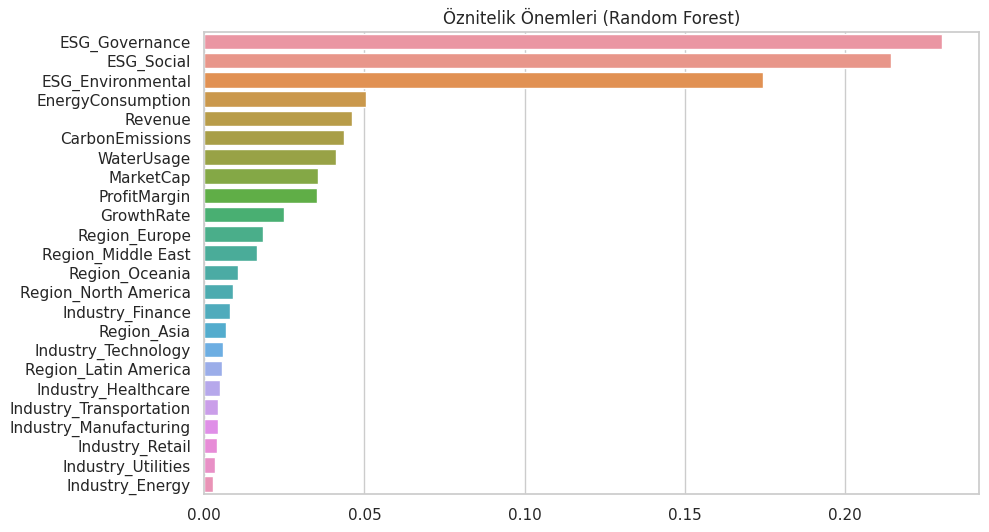

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Öznitelik Önemleri (Random Forest)")
plt.show()


In [18]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Kategorik sütunlar:", categorical_cols)


Kategorik sütunlar: Index(['CompanyName'], dtype='object')


In [19]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [20]:
print(df_encoded.columns)


Index(['CompanyID', 'Year', 'Revenue', 'ProfitMargin', 'MarketCap',
       'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social',
       'ESG_Governance',
       ...
       'CompanyName_Company_990', 'CompanyName_Company_991',
       'CompanyName_Company_992', 'CompanyName_Company_993',
       'CompanyName_Company_994', 'CompanyName_Company_995',
       'CompanyName_Company_996', 'CompanyName_Company_997',
       'CompanyName_Company_998', 'CompanyName_Company_999'],
      dtype='object', length=1026)


In [21]:
# Drop edilecek sütunlar (mevcut olanları)
drop_cols = ['ESG_Overall', 'CompanyID', 'Year']  # CompanyName artık yok
X = df_encoded.drop(columns=drop_cols)
y = df_encoded['ESG_Overall']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model oluştur
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

# Tahmin yap
y_pred = rf_reg.predict(X_test)

# Performans ölçümü
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 0.777234118744739
R2 Score: 0.997440681395134


Model çok başarılı:

R² çok yüksek, bu genellikle modelin veri setine çok iyi uyduğunu gösterir.

Overfitting kontrolü:

Test setindeki R² ve RMSE çok iyi ama dikkat et:

Eğer train R² neredeyse 1 ve test R² çok yüksekse, model veri setine fazla uyum sağlamış olabilir.

Özellikle çok sayıda one-hot encoded sütun varsa, bazı şirketlere özgü bilgiler modeli “ezberletmiş” olabilir.

İyileştirme önerileri:

Özellik önemlerini inceleyip gereksiz sütunları çıkarmak.

Hiperparametre optimizasyonu (RandomizedSearchCV veya GridSearchCV).

Eğer sınıflara ayırmak istersen, regression sonuçlarını kullanıp Low/Medium/High sınıflarını türetebilirsin.

In [24]:
# 3 sınıf örneği: Low (0-50), Medium (50-70), High (70-100)
y_class = pd.cut(df['ESG_Overall'], bins=[0,50,70,100], labels=['Low','Medium','High'])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9531818181818181
              precision    recall  f1-score   support

        High       0.97      0.92      0.94       383
         Low       0.96      0.97      0.96       851
      Medium       0.94      0.96      0.95       966

    accuracy                           0.95      2200
   macro avg       0.96      0.95      0.95      2200
weighted avg       0.95      0.95      0.95      2200



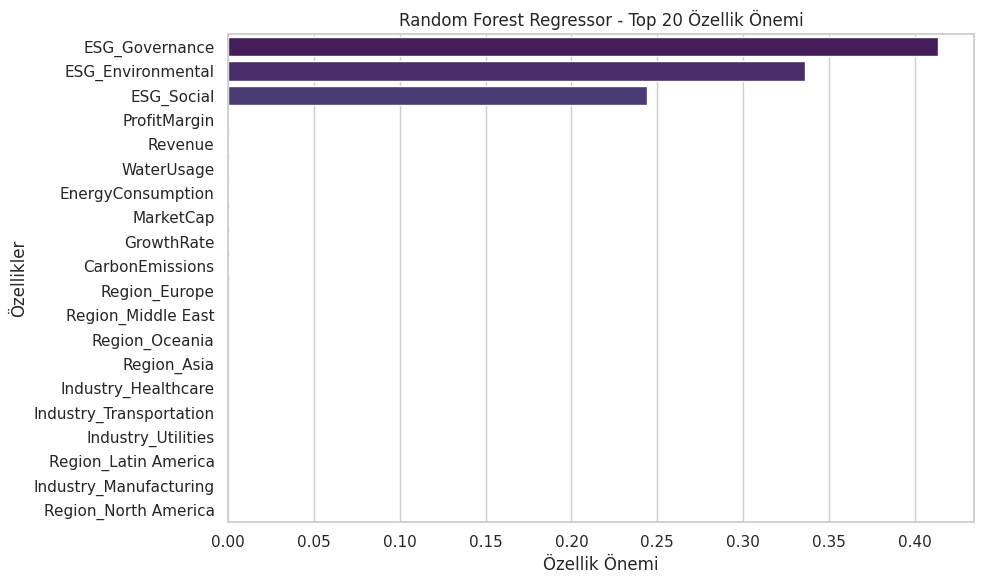

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Özellik önemleri
importances_reg = pd.Series(rf_reg.feature_importances_, index=X_train.columns)
importances_reg = importances_reg.sort_values(ascending=False).head(20)  # İlk 20 özelliği göster

# Görselleştirme
plt.figure(figsize=(10,6))
sns.barplot(x=importances_reg.values, y=importances_reg.index, palette="viridis")
plt.title("Random Forest Regressor - Top 20 Özellik Önemi")
plt.xlabel("Özellik Önemi")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()


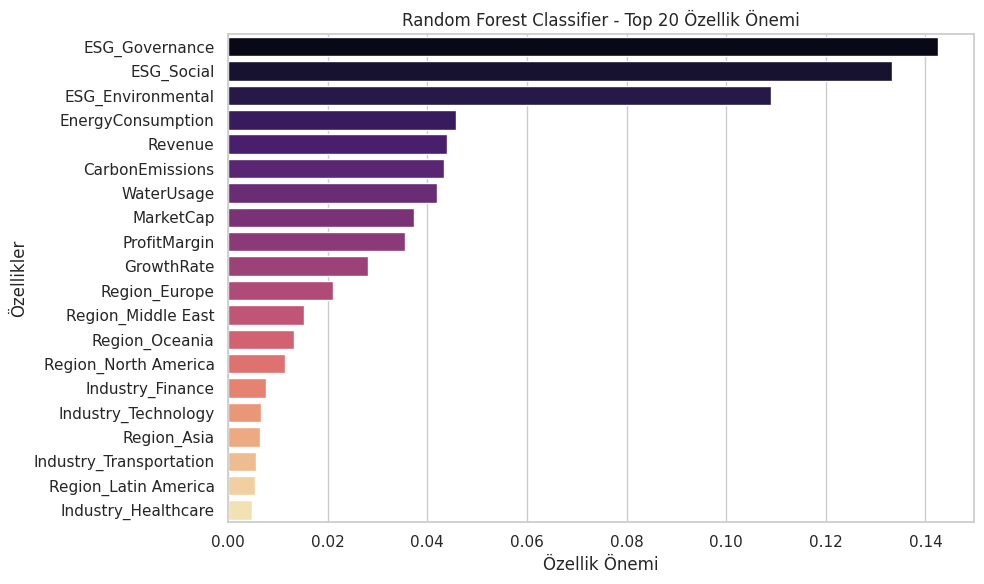

In [27]:
# Özellik önemleri
importances_clf = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
importances_clf = importances_clf.sort_values(ascending=False).head(20)  # İlk 20

# Görselleştirme
plt.figure(figsize=(10,6))
sns.barplot(x=importances_clf.values, y=importances_clf.index, palette="magma")
plt.title("Random Forest Classifier - Top 20 Özellik Önemi")
plt.xlabel("Özellik Önemi")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()


In [28]:
# Önemli özellikleri seçmek için Random Forest Regressor'dan aldığımız top 50 özelliği kullanabiliriz
top_features_reg = importances_reg.sort_values(ascending=False).head(50).index
X_train_sel = X_train[top_features_reg]
X_test_sel = X_test[top_features_reg]


In [29]:
top_features_clf = importances_clf.sort_values(ascending=False).head(50).index
X_train_sel_clf = X_train[top_features_clf]
X_test_sel_clf = X_test[top_features_clf]


RandomizedSearchCV ile Hyperparameter Tuning (Regression)

vazgeçtik

RandomizedSearchCV ile Hyperparameter Tuning (Classification)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

param_dist_clf = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = RandomForestClassifier(random_state=42)

random_search_clf = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist_clf,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_clf.fit(X_train_sel_clf, y_train)

print("En iyi parametreler (Classification):", random_search_clf.best_params_)

best_rf_clf = random_search_clf.best_estimator_
y_pred_clf = best_rf_clf.predict(X_test_sel_clf)

print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

En iyi parametreler (Classification): {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Accuracy: 0.9618181818181818
              precision    recall  f1-score   support

        High       0.97      0.93      0.95       383
         Low       0.97      0.97      0.97       851
      Medium       0.95      0.97      0.96       966

    accuracy                           0.96      2200
   macro avg       0.96      0.96      0.96      2200
weighted avg       0.96      0.96      0.96      2200



In [31]:
from sklearn.ensemble import RandomForestClassifier

# En iyi parametrelerle direkt model
best_rf = RandomForestClassifier(
    n_estimators=600,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)

# Eğit
best_rf.fit(X_train_sel, y_train)
y_pred = best_rf.predict(X_test_sel)


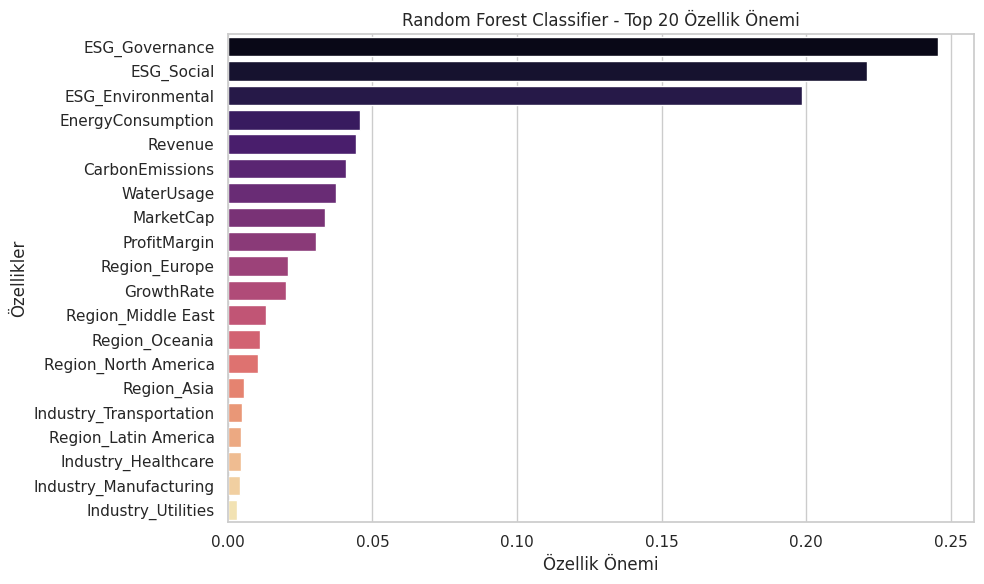

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Özellik önemlerini al
importances_clf = pd.Series(best_rf.feature_importances_, index=X_train_sel.columns)
importances_clf_top20 = importances_clf.sort_values(ascending=False).head(20)

# Görselleştirme
plt.figure(figsize=(10,6))
sns.barplot(x=importances_clf_top20.values, y=importances_clf_top20.index, palette="magma")
plt.title("Random Forest Classifier - Top 20 Özellik Önemi")
plt.xlabel("Özellik Önemi")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()


Accuracy: 0.9595454545454546
              precision    recall  f1-score   support

        High       0.97      0.93      0.95       383
         Low       0.97      0.97      0.97       851
      Medium       0.94      0.97      0.95       966

    accuracy                           0.96      2200
   macro avg       0.96      0.95      0.96      2200
weighted avg       0.96      0.96      0.96      2200



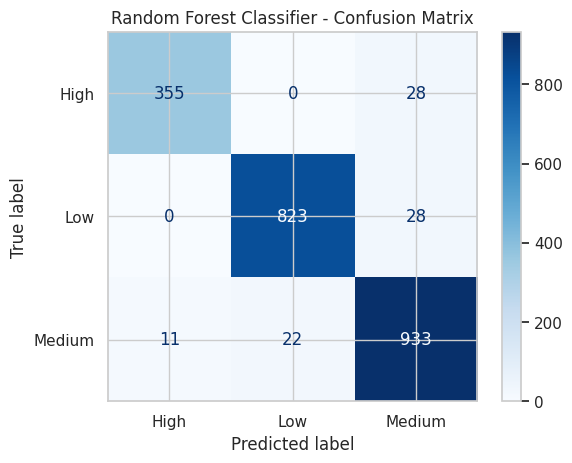

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Accuracy ve sınıf raporu
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix oluştur
cm = confusion_matrix(y_test, y_pred, labels=best_rf.classes_)

# Görselleştirme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Random Forest Classifier - Confusion Matrix")
plt.show()


In [34]:
y_pred = best_rf.predict(X_test_sel)


In [35]:
labels = random_search_clf.classes_


In [36]:
import plotly.graph_objects as go
import numpy as np

# Confusion matrix verisi
cm_values = cm.astype(float)

# Slider için adımlar
steps = []
for t in range(0, 101, 10):
    cm_filtered = cm_values.copy()
    cm_filtered[cm_filtered <= t] = np.nan
    
    step = dict(
        method="restyle",
        args=["z", [cm_filtered]],
        label=str(t)
    )
    steps.append(step)

fig = go.Figure(data=go.Heatmap(
    z=cm_values,
    x=labels,
    y=labels,
    colorscale='Blues',
    text=cm_values,
    texttemplate="%{text}",
    colorbar=dict(title='Count')
))

fig.update_layout(
    title="Confusion Matrix - Slider ile Threshold",
    sliders=[dict(active=0, steps=steps)],
    xaxis_title="Predicted",
    yaxis_title="Actual"
)
fig.show()


In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9595454545454546
              precision    recall  f1-score   support

        High       0.97      0.93      0.95       383
         Low       0.97      0.97      0.97       851
      Medium       0.94      0.97      0.95       966

    accuracy                           0.96      2200
   macro avg       0.96      0.95      0.96      2200
weighted avg       0.96      0.96      0.96      2200



1. ESG Performansını Tahmin Etme

ESG_Overall değerini (High, Medium, Low) şirketin finansal ve operasyonel verilerinden tahmin edebiliyoruz.

Bu sayede, yeni bir şirket veya yıl için ESG skorunu önceden tahmin etmek mümkün.

Örneğin: yatırımcılar veya risk analistleri, hangi şirketin sürdürülebilirlik performansı yüksek/orta/düşük görebilir.

2️⃣ Önemli Özellikleri Belirleme (Feature Importance)

Random Forest modeli, hangi değişkenlerin ESG’yi en çok etkilediğini gösteriyor:

Örneğin: ProfitMargin, Revenue, MarketCap veya belirli ESG alt başlıkları.

Bu sayede şirketler hangi alanlara odaklanırsa ESG performansını artırabilir sorusuna cevap bulabilir.

3️⃣ Hata Analizi ve Sınıf Dağılımı (Confusion Matrix)

Model hangi sınıflarda iyi tahmin yapıyor, hangi sınıflarda hata yapıyor, görülebiliyor.

Örneğin: “Medium” ESG’li şirketler bazen “High” veya “Low” tahmin ediliyorsa, bu sınıfların birbirine yakın olduğunu gösterir.

Karar vericiler için risk analizi ve strateji geliştirme imkânı sağlar.

4️⃣ Interaktif Dashboard Kullanımı

Slider ve filtrelerle:

Hangi sınıflara daha fazla odaklanacağını seçebilirsin

Feature importance’ı interaktif inceleyebilirsin

Bu sayede veriyi keşfetmek, görselleştirmek ve sunmak çok daha kolay ve etkili.

5️⃣ İş Dünyasında Uygulama Örnekleri

Yatırım Analizi: ESG skoru yüksek şirketleri önceliklendirme.

Kurumsal Strateji: ESG’yi artıracak alanları belirleme.

Raporlama ve Sunum: Yönetim kurulu veya yatırımcılara interaktif dashboard ile ESG performansı göstermek.

In [38]:
trained_columns = X_train_sel.columns


In [39]:
# Tüm sütunları 0 ile başlat
example_company_full = pd.DataFrame(np.zeros((1, len(trained_columns))), columns=trained_columns)

# Sayısal özellikleri doldur
example_company_full['Revenue'] = 500
example_company_full['ProfitMargin'] = 5.0
example_company_full['MarketCap'] = 350
example_company_full['GrowthRate'] = 3.5
example_company_full['ESG_Environmental'] = 60.0
example_company_full['ESG_Social'] = 40.0
example_company_full['ESG_Governance'] = 55.0

# Sadece eğitimde olan industry ve region sütunlarını doldur
# Örneğin eğitimde 'Industry_Retail' yoksa bunu atla
for col in ['Industry_Retail', 'Industry_Technology', 'Region_Europe']:
    if col in example_company_full.columns:
        example_company_full[col] = 1


In [40]:
predicted_class = best_rf.predict(example_company_full)
predicted_proba = best_rf.predict_proba(example_company_full)

print("Tahmin Edilen ESG Sınıfı:", predicted_class[0])
print("Sınıf Olasılıkları:", dict(zip(best_rf.classes_, predicted_proba[0])))


Tahmin Edilen ESG Sınıfı: Medium
Sınıf Olasılıkları: {'High': 0.07596031746031746, 'Low': 0.270853835978836, 'Medium': 0.6531858465608468}


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tahmin yap
y_pred = best_rf.predict(X_test_sel)

# Performans metrikleri
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9595454545454546

Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.93      0.95       383
         Low       0.97      0.97      0.97       851
      Medium       0.94      0.97      0.95       966

    accuracy                           0.96      2200
   macro avg       0.96      0.95      0.96      2200
weighted avg       0.96      0.96      0.96      2200



https://www.kaggle.com/code/sedatakda/comparison-of-companies-s-esg-and-financial